In [1]:
#%pip install matplotlib pandas

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("salary_data.csv").head(100)
df = pd.DataFrame({
    "x" : df["Years of Experience"],
    "y" : df["Salary"]
})

df

,x,y
0,5.0,90000.0
1,3.0,65000.0
2,15.0,150000.0
3,7.0,60000.0
4,20.0,200000.0
...,...,...
95,12.0,65000.0
96,22.0,160000.0
97,1.0,35000.0
98,10.0,90000.0


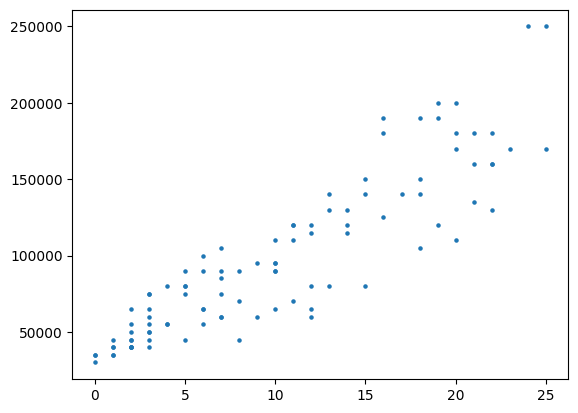

In [3]:
plt.scatter(df[["x"]], df["y"], s=5)
plt.show()


In [4]:
def cost_function(m, b):
    total = 0
    for i in range(len(df)):
        total+=df["y"].iloc[i]-(m*df["x"]+b)**2
    return total/len(df)

In [5]:
# I don't fully understand this, but I'm following this video https://www.youtube.com/watch?v=VmbA0pi2cRQ&t=254s by NeuralNine for a little understanding 
def gradient_descent(current_m, current_b, rate):
    m_gradient = 0
    b_gradient = 0

    n = len(df)

    for i in range(n):
        x = df["x"].iloc[i]
        y = df["y"].iloc[i]

        m_gradient += (-2/n) * x * (y - (current_m * x + current_b))
        b_gradient += (-2/n) * (y - (current_m * x + current_b))

    
    m = current_m - m_gradient * rate
    b = current_b - b_gradient * rate

    return m, b

In [20]:
def closed_form():
    numerator=0
    denominator = 0
    mx = sum(df["x"])/len(df["x"])
    my = sum(df["y"])/len(df["y"])
    for i in range(len(df)):
        numerator+=(df["x"].iloc[i]-mx)*(df["y"].iloc[i]-my)
        denominator+=(df["x"].iloc[i]-mx)**2
    m = numerator/denominator
    b = my-m*mx

    return m, b

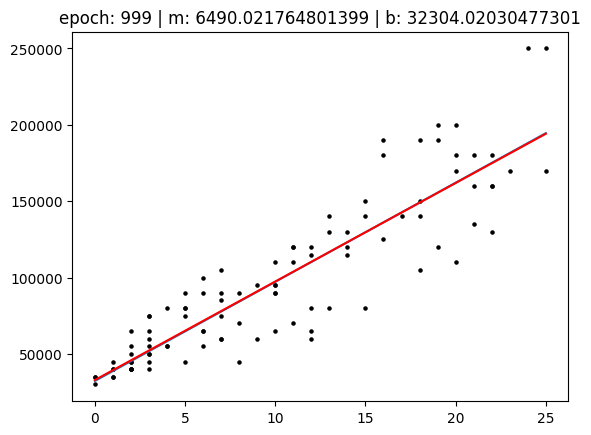

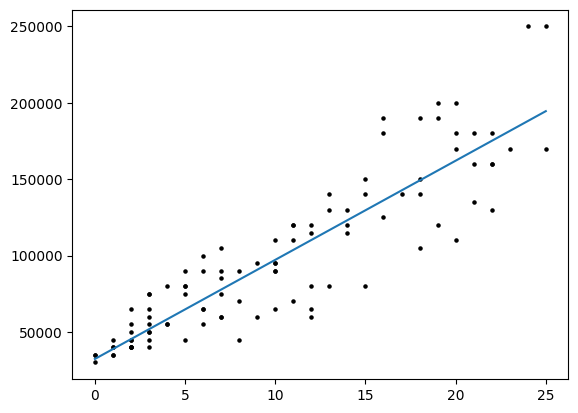

In [ ]:
from IPython import display

m = 0
b = 0
rate = 0.006
epochs = 1000

closed_m, closed_b = closed_form()

for i in range(epochs):
    m, b = gradient_descent(m, b, rate)
    if i % 1 == 0:
        display.clear_output(wait = True)
        plt.scatter(df[["x"]], df["y"], color="black", s=5)

        plt.plot(list(range(int(df["x"].min()), int(df["x"].max()+1))), [i*closed_m+closed_b for i in range(int(df["x"].min()), int(df["x"].max()+1))], color="red", linewidth="1")
        plt.plot(list(range(int(df["x"].min()), int(df["x"].max()+1))), [i*m+b for i in range(int(df["x"].min()), int(df["x"].max()+1))])
        plt.title(f"epoch: {i} | m: {m} | b: {b}")
        plt.show()

plt.scatter(df[["x"]], df["y"], color="black", s=5)
plt.plot(list(range(int(df["x"].min()), int(df["x"].max()+1))), [i*m+b for i in range(int(df["x"].min()), int(df["x"].max()+1))])
plt.show()